['../logs/main/ResNet18/CIFAR10/HessianParam/0.1/42/0.9/20250119162333/test/final_weight', '../logs/main/ResNet18/CIFAR10/L1/0.1/42/0.9/20250119162333/test/final_weight', '../logs/main/ResNet18/CIFAR10/Hessian/0.1/42/0.9/20250119162334/test/final_weight', '../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250119062520/test/final_weight']
{'clean': [91.32, 82.53, 89.91, 93.1], 'brightness': [22.574, 16.344, 22.594, 28.184], 'contrast': [22.214, 15.868, 22.23, 28.252], 'defocus_blur': [22.254, 16.246, 22.262, 27.418], 'elastic_transform': [20.584, 15.734, 20.87, 25.298], 'fog': [21.988, 16.072, 22.024, 27.696], 'frost': [20.91, 15.204, 20.852, 26.112], 'gaussian_blur': [22.132, 15.93, 22.036, 27.344], 'gaussian_noise': [18.562, 13.856, 18.872, 22.754], 'glass_blur': [17.242, 13.526, 17.368, 20.37], 'impulse_noise': [18.344, 13.988, 18.47, 22.134], 'jpeg_compression': [18.642, 15.056, 18.978, 22.782], 'motion_blur': [21.352, 16.05, 21.36, 26.596], 'pixelate': [20.882, 15.786, 20.926, 25.684

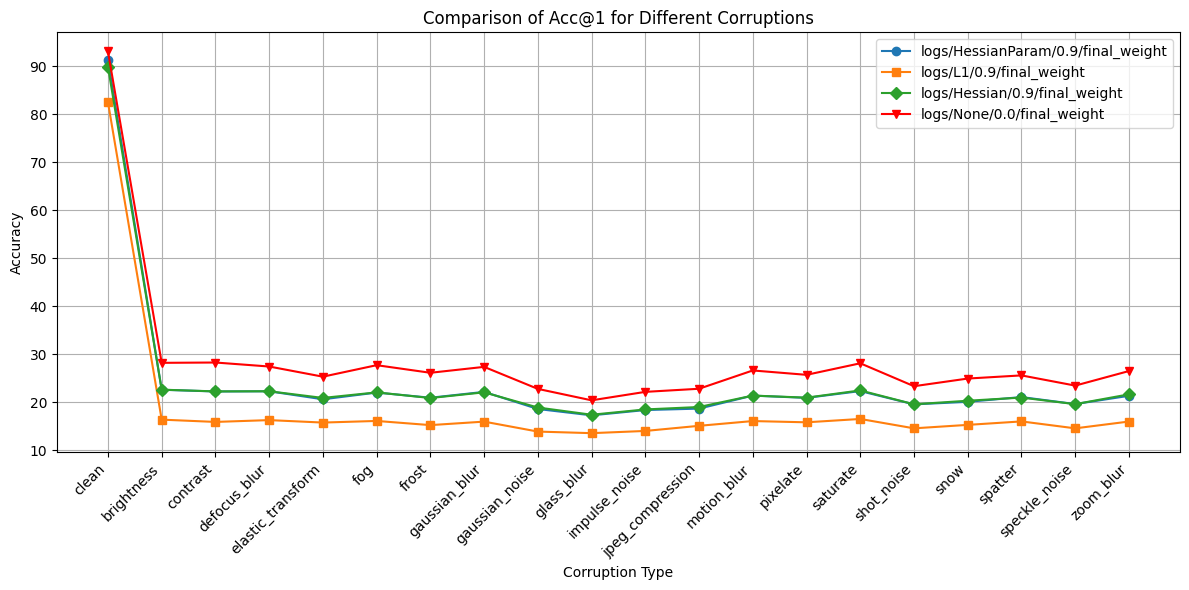

In [19]:
import matplotlib.pyplot as plt
import os
import glob
Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100', 'logs/debug/ResNet18/CIFAR10/None/0.0001/42/0.5/20250109151522/test/final_weight']
paths = glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/42/0.9/*/test/final_weight')
paths.append('../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250119062520/test/final_weight')
print(paths)
for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    # Acc1 = []
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))
Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
print(Acc1_dict)
# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[1]+'/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1]), linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[1]+'/'+paths[i+1].split('/')[-7]+'/'+paths[i+1].split('/')[-4]+'/'+paths[i+1].split('/')[-1]), color='r', linestyle='-')

plt.xlabel('Corruption Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Acc@1 for Different Corruptions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('corruption_comparison.png')
plt.show()